`https://github.com/PYFTS/notebooks/blob/master/A_short_tutorial_about_Fuzzy_Time_Series.ipynb`

#### 🔃 Import Packages

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pyFTS.partitioners import Grid
from pyFTS.models import chen
from pyFTS.common import Util

from sklearn.metrics import mean_absolute_percentage_error

#### 📥 Load Data

In [81]:
df = pd.read_excel('data/unilever.xlsx')
df.Date = pd.to_datetime(df.Date)

df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-01-01,2210,2350,2190,2260,1550.649902,18655300
1,2010-02-01,2290,2340,2110,2300,1578.095215,67990060
2,2010-03-01,2300,2640,2260,2430,1667.292114,165762500
3,2010-04-01,2430,2800,2400,2770,1900.575684,120215000
4,2010-05-01,2890,3310,2720,3120,2140.721436,175372500
...,...,...,...,...,...,...,...
163,2023-08-01,3830,3850,3630,3670,3541.577148,251847200
164,2023-09-01,3670,3890,3460,3740,3609.127441,244503000
165,2023-10-01,3740,4100,3540,3620,3493.326904,327835300
166,2023-11-01,3600,3670,3410,3650,3522.276855,302442300


#### 📈 Visualize Trend

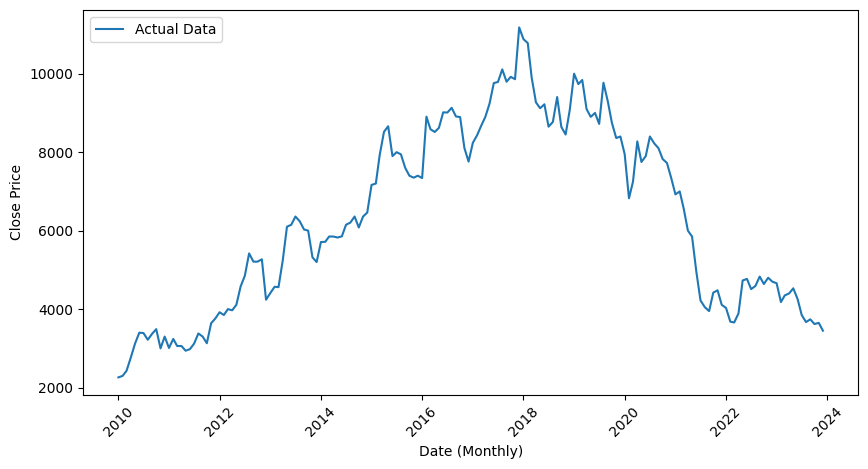

In [82]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[10,5])

plt.plot(df.Date, df.Close, label='Actual Data')
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.xlabel('Date (Monthly)')
plt.ylabel('Close Price')
plt.show()

#### 📊 Partitions / Interval
**Definition of the Universe of Discourse U & Linguistic variable creation**
<br>
The Universe of Discourse (U) partitioners are responsible for identifying U, split the partitions and create their fuzzy sets. There are several ways to partition U and this has a direct impact on the accuracy of the predictive model.

In [83]:
npart = 64

c:\Users\febri\projects\fts_lee\env_fts_lee\lib\site-packages\pyFTS\partitioners\partitioner.py:238: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.xaxis.set_ticklabels(ticks)


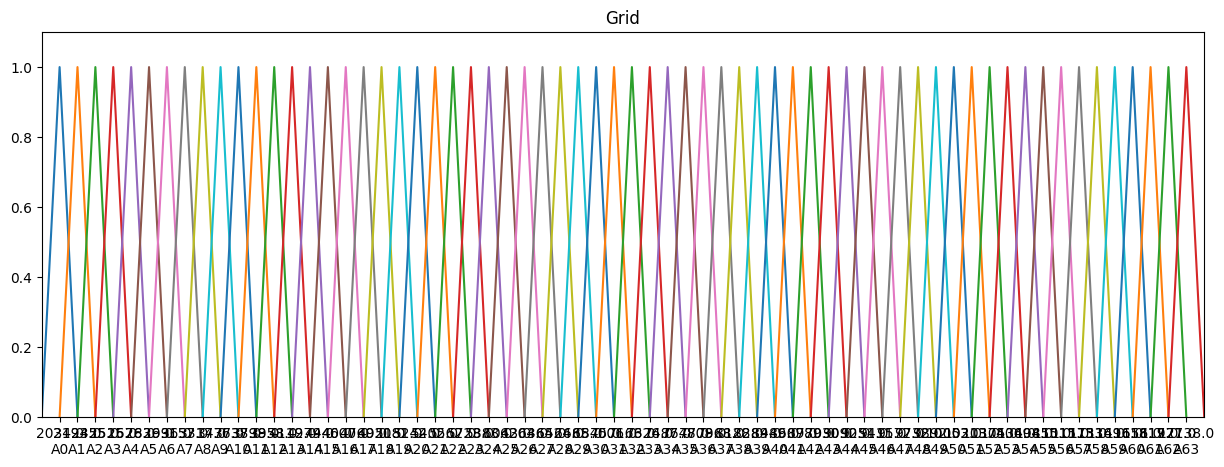

In [84]:
data = df.Close.values
fs = Grid.GridPartitioner(data=data, npart=npart)

fig, ax = plt.subplots(nrows=1, figsize=[15, 5])
fs.plot(ax)

#### View Fuzzified Data

In [85]:
fuzzyfied = fs.fuzzyfy(data, method='maximum', mode='sets')

fuzzyfied

['A1',
 'A2',
 'A2',
 'A5',
 'A7',
 'A9',
 'A8',
 'A7',
 'A8',
 'A9',
 'A6',
 'A8',
 'A6',
 'A8',
 'A6',
 'A6',
 'A6',
 'A6',
 'A7',
 'A8',
 'A8',
 'A7',
 'A10',
 'A11',
 'A12',
 'A11',
 'A12',
 'A12',
 'A13',
 'A16',
 'A18',
 'A21',
 'A20',
 'A20',
 'A20',
 'A14',
 'A15',
 'A16',
 'A16',
 'A20',
 'A25',
 'A26',
 'A27',
 'A26',
 'A25',
 'A25',
 'A20',
 'A20',
 'A23',
 'A23',
 'A24',
 'A24',
 'A24',
 'A24',
 'A26',
 'A26',
 'A27',
 'A25',
 'A27',
 'A28',
 'A32',
 'A32',
 'A37',
 'A40',
 'A41',
 'A37',
 'A37',
 'A37',
 'A35',
 'A33',
 'A33',
 'A33',
 'A33',
 'A43',
 'A41',
 'A40',
 'A41',
 'A44',
 'A43',
 'A44',
 'A43',
 'A43',
 'A38',
 'A36',
 'A39',
 'A40',
 'A41',
 'A43',
 'A45',
 'A48',
 'A48',
 'A50',
 'A48',
 'A49',
 'A49',
 'A57',
 'A55',
 'A55',
 'A49',
 'A45',
 'A44',
 'A45',
 'A41',
 'A42',
 'A46',
 'A41',
 'A40',
 'A44',
 'A50',
 'A48',
 'A49',
 'A44',
 'A43',
 'A43',
 'A42',
 'A48',
 'A45',
 'A42',
 'A39',
 'A40',
 'A37',
 'A30',
 'A33',
 'A39',
 'A36',
 'A37',
 'A40',
 'A39'

#### View Fuzzy Logical Relationship (FLR)

In [86]:
from pyFTS.common import FLR

patterns = FLR.generate_non_recurrent_flrs(fuzzyfied)

print([str(k) for k in patterns])

['A1 -> A2', 'A2 -> A2', 'A2 -> A5', 'A5 -> A7', 'A7 -> A9', 'A9 -> A8', 'A8 -> A7', 'A7 -> A8', 'A8 -> A9', 'A9 -> A6', 'A6 -> A8', 'A8 -> A6', 'A6 -> A6', 'A6 -> A7', 'A8 -> A8', 'A7 -> A10', 'A10 -> A11', 'A11 -> A12', 'A12 -> A11', 'A12 -> A12', 'A12 -> A13', 'A13 -> A16', 'A16 -> A18', 'A18 -> A21', 'A21 -> A20', 'A20 -> A20', 'A20 -> A14', 'A14 -> A15', 'A15 -> A16', 'A16 -> A16', 'A16 -> A20', 'A20 -> A25', 'A25 -> A26', 'A26 -> A27', 'A27 -> A26', 'A26 -> A25', 'A25 -> A25', 'A25 -> A20', 'A20 -> A23', 'A23 -> A23', 'A23 -> A24', 'A24 -> A24', 'A24 -> A26', 'A26 -> A26', 'A27 -> A25', 'A25 -> A27', 'A27 -> A28', 'A28 -> A32', 'A32 -> A32', 'A32 -> A37', 'A37 -> A40', 'A40 -> A41', 'A41 -> A37', 'A37 -> A37', 'A37 -> A35', 'A35 -> A33', 'A33 -> A33', 'A33 -> A43', 'A43 -> A41', 'A41 -> A40', 'A41 -> A44', 'A44 -> A43', 'A43 -> A44', 'A43 -> A43', 'A43 -> A38', 'A38 -> A36', 'A36 -> A39', 'A39 -> A40', 'A41 -> A43', 'A43 -> A45', 'A45 -> A48', 'A48 -> A48', 'A48 -> A50', 'A50 -> 

#### 📐 Rule Generation

In [87]:
model = chen.ConventionalFTS(partitioner=fs)
model.fit(data)

print(model)

Conventional FTS:
A1 -> A2
A2 -> A2,A5
A5 -> A7
A9 -> A6,A8
A6 -> A6,A7,A8
A8 -> A6,A7,A8,A9
A7 -> A10,A8,A9
A10 -> A10,A11,A12,A9
A11 -> A10,A12
A12 -> A10,A11,A12,A13,A15,A17
A14 -> A11,A13,A15
A13 -> A12,A14,A16
A15 -> A13,A15,A16
A17 -> A15,A16,A17
A16 -> A13,A14,A16,A17,A18,A20
A18 -> A14,A21
A21 -> A20
A20 -> A14,A20,A23,A25
A24 -> A18,A24,A26
A23 -> A23,A24
A25 -> A20,A24,A25,A26,A27
A26 -> A25,A26,A27
A27 -> A25,A26,A28
A31 -> A28
A28 -> A25,A32
A30 -> A31,A33
A35 -> A33
A32 -> A32,A37
A37 -> A30,A35,A37,A40
A38 -> A36
A33 -> A30,A33,A39,A43
A36 -> A35,A37,A39
A39 -> A36,A38,A40
A40 -> A37,A39,A41,A44
A46 -> A41
A41 -> A37,A40,A42,A43,A44
A43 -> A38,A41,A42,A43,A44,A45
A45 -> A41,A42,A44,A48
A42 -> A39,A46,A48
A44 -> A43,A45,A50
A48 -> A45,A48,A49,A50
A50 -> A48
A49 -> A44,A45,A49,A57
A55 -> A49,A55
A57 -> A55



#### ⚠️ `Failed` Visualize Rules

In [88]:
# Util.plot_rules(model, size=[15, 5], rules_by_axis=npart)

#### Fuzzification Example

In [89]:
fuzzyfied = fs.fuzzyfy(7000, method='maximum', mode='sets')

print(fuzzyfied)

A31


#### 📤 Find the compatible rules & Defuzzyfy

In [90]:
model.predict([7000])

[6524.5]

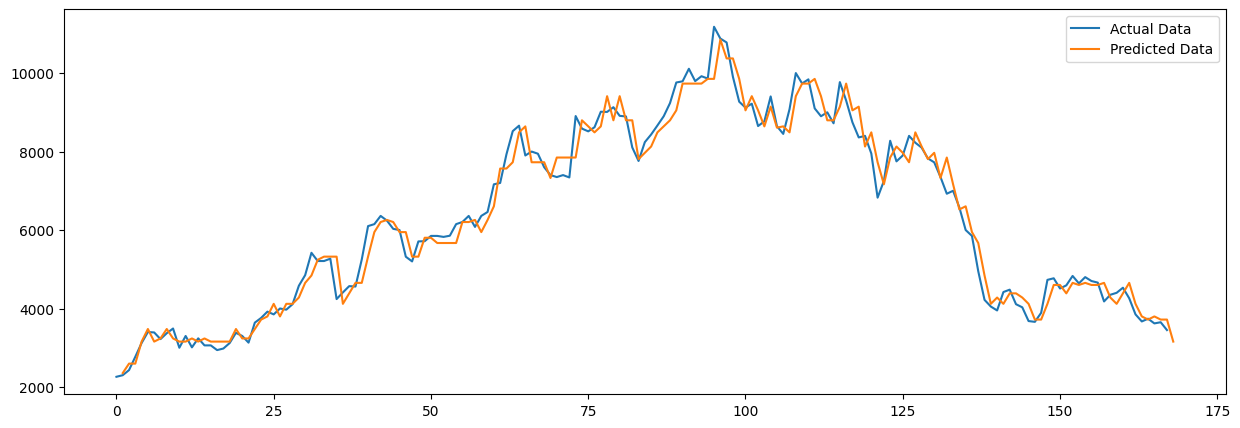

In [91]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=[15, 5])

forecasts = model.predict(data)
forecasts.insert(0, None)

orig, = plt.plot(data, label="Actual Data")
pred, = plt.plot(forecasts, label="Predicted Data")

plt.legend(handles=[orig, pred])
plt.show()

#### 🎯 Accuracy

In [92]:
mean_absolute_percentage_error(data[1:], forecasts[1:-1])

0.04508353067439933